In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [52]:
# lower the capitals of the column names
df.columns = df.columns.str.lower()
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [53]:
df.fuel_efficiency_mpg.isnull().sum()

np.int64(0)

In [54]:
df = df.fillna(0)
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [55]:
# Do train / validation / test split
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg
y_val = df_val.fuel_efficiency_mpg
y_test = df_test.fuel_efficiency_mpg

del df_train["fuel_efficiency_mpg"]
del df_val["fuel_efficiency_mpg"]
del df_test["fuel_efficiency_mpg"]

In [56]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,120,5.0,169.0,2966.679505,13.9,2005,USA,Gasoline,Front-wheel drive,-1.0
1,200,3.0,143.0,2950.822121,17.1,2013,Asia,Diesel,Front-wheel drive,-1.0
2,180,6.0,180.0,3078.221669,17.4,2007,USA,Gasoline,All-wheel drive,0.0
3,280,5.0,174.0,2797.991793,0.0,2016,USA,Diesel,All-wheel drive,0.0
4,250,4.0,133.0,2362.426930,16.3,2010,USA,Diesel,Front-wheel drive,-1.0


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [68]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [69]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [72]:
from sklearn.tree import export_text
   
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



**Q1: Which feature is used for splitting the data?**

**A: 'Vehicle_weight'**

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf = RandomForestRegressor(n_estimators=10, random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [75]:
y_pred = rf.predict(X_val)

In [79]:
from sklearn.metrics import root_mean_squared_error

In [85]:
root_mean_squared_error(y_val,y_pred)

0.4595777223092726

**Q2: What's the RMSE of this model on the validation data?**

**A: 0.45**

In [89]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    
    scores.append((n, rmse))

In [90]:
scores

[(10, 0.4595777223092726),
 (20, 0.45359067251247054),
 (30, 0.45168672575457125),
 (40, 0.4487208301736997),
 (50, 0.4466568972416094),
 (60, 0.44545970260811213),
 (70, 0.4451263244986996),
 (80, 0.4449843119777284),
 (90, 0.4448614906399875),
 (100, 0.4446518680868042),
 (110, 0.44357876439860233),
 (120, 0.4439118681233817),
 (130, 0.443702590396687),
 (140, 0.4433549955101688),
 (150, 0.44289761494219454),
 (160, 0.4427612219659299),
 (170, 0.44280146504730905),
 (180, 0.44236195357041347),
 (190, 0.4424939711220692),
 (200, 0.4424785084688597)]

In [91]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,0.459578
1,20,0.453591
2,30,0.451687
3,40,0.448721
4,50,0.446657
5,60,0.445460
6,70,0.445126
7,80,0.444984
8,90,0.444861
9,100,0.444652


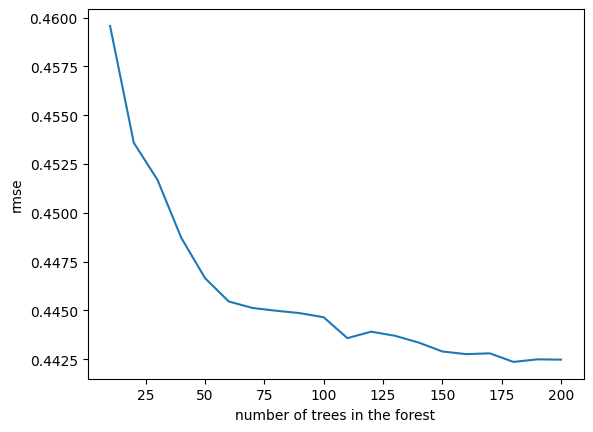

In [92]:
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.xlabel('number of trees in the forest')
plt.ylabel('rmse')
plt.show()

**Q3: After which value of n_estimators does RMSE stop improving?**

**A: 200**

In [93]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators = n, 
                                   max_depth = d, 
                                   random_state = 1, 
                                   n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)

        scores.append((d, n, rmse))

In [94]:
scores

[(10, 10, 0.4502486597058524),
 (10, 20, 0.446857033629202),
 (10, 30, 0.4454739645941374),
 (10, 40, 0.44306731129625837),
 (10, 50, 0.4419566862179357),
 (10, 60, 0.4416730330613033),
 (10, 70, 0.4412975503694071),
 (10, 80, 0.4414352350072895),
 (10, 90, 0.4415215165581006),
 (10, 100, 0.44121699790710184),
 (10, 110, 0.440526227247825),
 (10, 120, 0.4407083659646053),
 (10, 130, 0.440629500094825),
 (10, 140, 0.44033941277349004),
 (10, 150, 0.43994270355172643),
 (10, 160, 0.43979740503833187),
 (10, 170, 0.44001743947445027),
 (10, 180, 0.4397488696817067),
 (10, 190, 0.4398542002181508),
 (10, 200, 0.43984510625501455),
 (15, 10, 0.4576238478625812),
 (15, 20, 0.45307187353797973),
 (15, 30, 0.4508686966214543),
 (15, 40, 0.448609348897959),
 (15, 50, 0.44631807691848663),
 (15, 60, 0.4452920607552113),
 (15, 70, 0.4446057004494103),
 (15, 80, 0.44456685304987675),
 (15, 90, 0.44457621900521277),
 (15, 100, 0.4443410830874172),
 (15, 110, 0.44347884734275095),
 (15, 120, 0.44373

In [95]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,n_estimators,rmse
0,10,10,0.450249
1,10,20,0.446857
2,10,30,0.445474
3,10,40,0.443067
4,10,50,0.441957
...,...,...,...
75,25,160,0.442800
76,25,170,0.442843
77,25,180,0.442409
78,25,190,0.442534


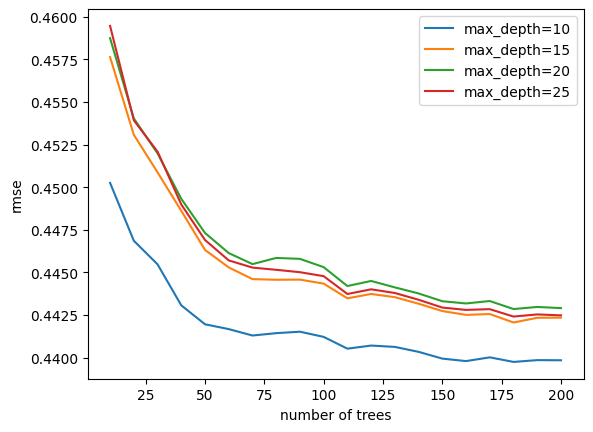

In [96]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)


plt.legend()
plt.xlabel('number of trees')
plt.ylabel('rmse')
plt.show()

**Q4: What's the best max_depth, using the mean RMSE?**

**A: 25**

In [97]:
rf = RandomForestRegressor(n_estimators = 10,
                           max_depth = 20,
                           random_state = 1,
                           n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [98]:
rf.feature_importances_

array([1.14797006e-02, 3.57108549e-04, 3.45384113e-04, 3.27279191e-03,
       3.25424323e-04, 3.60383601e-04, 1.59978977e-02, 3.21230009e-03,
       2.34334695e-03, 1.63498954e-03, 4.62246496e-04, 5.18739639e-04,
       5.39721689e-04, 9.59149965e-01])

In [99]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.get_feature_names_out()
df_importances['importance'] = rf.feature_importances_
df_importances

,feature,importance
0,acceleration,0.011480
1,drivetrain=All-wheel drive,0.000357
2,drivetrain=Front-wheel drive,0.000345
3,engine_displacement,0.003273
4,fuel_type=Diesel,0.000325
5,fuel_type=Gasoline,0.000360
6,horsepower,0.015998
7,model_year,0.003212
8,num_cylinders,0.002343
9,num_doors,0.001635


In [100]:
df_importances.sort_values(by='importance', ascending=False)

,feature,importance
13,vehicle_weight,0.959150
6,horsepower,0.015998
0,acceleration,0.011480
3,engine_displacement,0.003273
7,model_year,0.003212
8,num_cylinders,0.002343
9,num_doors,0.001635
12,origin=USA,0.000540
11,origin=Europe,0.000519
10,origin=Asia,0.000462


In [101]:
type(df_importances.feature)

pandas.core.series.Series

Text(0.5, 0, 'Random Forest Feature Importance')

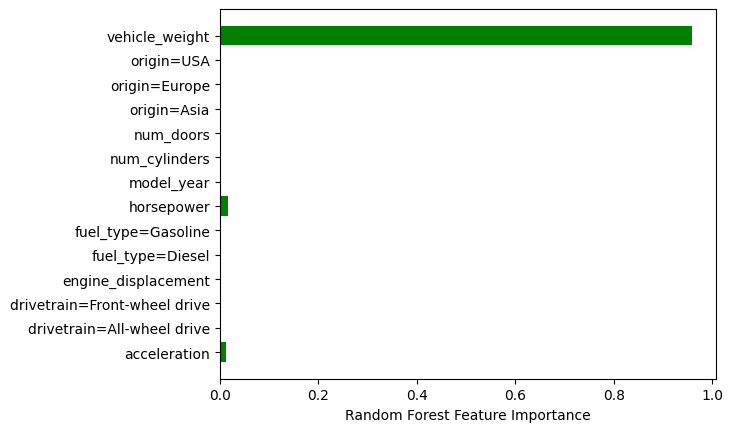

In [102]:
plt.barh(df_importances.feature, df_importances.importance, color = 'green')
plt.xlabel("Random Forest Feature Importance")

**Q5: What's the most important feature (among these 4)?**

**A: vehicle_weight**

In [103]:
!pip install xgboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [104]:
import xgboost as xgb

In [105]:
features = dv.get_feature_names_out()
features 

array(['acceleration', 'drivetrain=All-wheel drive',
       'drivetrain=Front-wheel drive', 'engine_displacement',
       'fuel_type=Diesel', 'fuel_type=Gasoline', 'horsepower',
       'model_year', 'num_cylinders', 'num_doors', 'origin=Asia',
       'origin=Europe', 'origin=USA', 'vehicle_weight'], dtype=object)

In [107]:
features= [i.replace("=<", "_").replace("=","_") for i in features]  #thanks FAQ and slack
features

['acceleration',
 'drivetrain_All-wheel drive',
 'drivetrain_Front-wheel drive',
 'engine_displacement',
 'fuel_type_Diesel',
 'fuel_type_Gasoline',
 'horsepower',
 'model_year',
 'num_cylinders',
 'num_doors',
 'origin_Asia',
 'origin_Europe',
 'origin_USA',
 'vehicle_weight']

In [108]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [109]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [110]:
#%%capture output
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',    
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval = 5, evals=watchlist)

[0]	train-rmse:1.81393	val-rmse:1.85444
[5]	train-rmse:0.51381	val-rmse:0.55664
[10]	train-rmse:0.37115	val-rmse:0.43896
[15]	train-rmse:0.34666	val-rmse:0.43362
[20]	train-rmse:0.33553	val-rmse:0.43376
[25]	train-rmse:0.32268	val-rmse:0.43683
[30]	train-rmse:0.31475	val-rmse:0.43752
[35]	train-rmse:0.30960	val-rmse:0.43784
[40]	train-rmse:0.30202	val-rmse:0.43968
[45]	train-rmse:0.29126	val-rmse:0.44024
[50]	train-rmse:0.28456	val-rmse:0.44140
[55]	train-rmse:0.27618	val-rmse:0.44225
[60]	train-rmse:0.26768	val-rmse:0.44290
[65]	train-rmse:0.26174	val-rmse:0.44352
[70]	train-rmse:0.25489	val-rmse:0.44531
[75]	train-rmse:0.24792	val-rmse:0.44628
[80]	train-rmse:0.24254	val-rmse:0.44689
[85]	train-rmse:0.23644	val-rmse:0.44749
[90]	train-rmse:0.23193	val-rmse:0.44839
[95]	train-rmse:0.22475	val-rmse:0.44904
[99]	train-rmse:0.21950	val-rmse:0.45018


In [111]:
#%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',    
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval = 5, evals=watchlist)

[0]	train-rmse:2.28944	val-rmse:2.34561
[5]	train-rmse:1.41247	val-rmse:1.44988
[10]	train-rmse:0.91008	val-rmse:0.94062
[15]	train-rmse:0.63402	val-rmse:0.66672
[20]	train-rmse:0.48983	val-rmse:0.53064
[25]	train-rmse:0.41881	val-rmse:0.46891
[30]	train-rmse:0.38342	val-rmse:0.44289
[35]	train-rmse:0.36435	val-rmse:0.43250
[40]	train-rmse:0.35343	val-rmse:0.42746
[45]	train-rmse:0.34621	val-rmse:0.42595
[50]	train-rmse:0.33998	val-rmse:0.42498
[55]	train-rmse:0.33480	val-rmse:0.42449
[60]	train-rmse:0.33054	val-rmse:0.42456
[65]	train-rmse:0.32602	val-rmse:0.42493
[70]	train-rmse:0.32202	val-rmse:0.42503
[75]	train-rmse:0.31895	val-rmse:0.42526
[80]	train-rmse:0.31667	val-rmse:0.42563
[85]	train-rmse:0.31440	val-rmse:0.42574
[90]	train-rmse:0.31059	val-rmse:0.42586
[95]	train-rmse:0.30625	val-rmse:0.42611
[99]	train-rmse:0.30419	val-rmse:0.42623


In [112]:
scores = {}

In [113]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',    
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval = 5, evals=watchlist)

In [114]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [115]:
scores['eta=0.3'] = parse_xgb_output(output)

In [116]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',    
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval = 5, evals=watchlist)

In [117]:
scores['eta=0.1'] = parse_xgb_output(output)

In [118]:
scores['eta=0.1']

,num_iter,train_rmse,val_rmse
0,0,2.28944,2.34561
1,5,1.41247,1.44988
2,10,0.91008,0.94062
3,15,0.63402,0.66672
4,20,0.48983,0.53064
5,25,0.41881,0.46891
6,30,0.38342,0.44289
7,35,0.36435,0.43250
8,40,0.35343,0.42746
9,45,0.34621,0.42595


/tmp/ipykernel_5396/1300581635.py:7: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0.45,0.45)


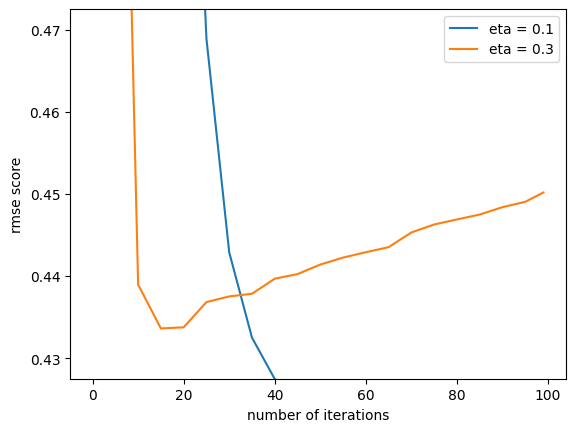

In [ ]:
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_rmse,label='eta = 0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_rmse,label='eta = 0.3')
plt.legend()

plt.xlabel('number of iterations')
plt.ylabel('rmse score')
#plt.ylim(0.45,0.45)
plt.show()